## **Assignment:** Multi-Layer Perceptron in XOR Gate

### Multi-Layer Perceptron
- A `Multi-Layer Perceptron` is a fully-connected feed-forward neural network.
- In the `Sequential` class of models, we can have linear stack of layers.
- In the `Dense` class, every neuron is connected to every other neuron in the next layer, and so on.

In [3]:
# import packages
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam


In [4]:
# Problem: XOR Gate.
x = np.array([[0,0],
              [1,1],
              [0,1],
              [1,0]])
y = np.array([[0],
             [0],
             [1],
             [1]])

# Model
- ReLU:
    - If $wx+v < 0 -> 0$
    - If $wx+v \geq 0 -> 1$
- model.add(): Add the layers one by one. We need a total of 2 Dense layers.
- Dense():
    - **2**: The first parameter, specifies the number of nuerons in the dense layer.
    - **input_dim**: Input dimensions, equal to the number of features.
    - **activation**: Activation function to be used within the layer.
    - If we put `input_dim`, the layer becomes the input layer, otherwise it is a hidden layer.
- Compile() is used to configure the loss function, optimizer and metrics.
    - **loss**: Loss Function measures how well your model's predictions match the actual target values (y) during training. It quantifies the error the model is making.
    - **optimizer**: An algorithm that adjusts the weights and biases of your neural network during training to minimize the loss function.
    - **metrics**: Used to evaluate the performance of your model. They provide a way to measure how well the model is doing, often on a separate dataset (validation or test set) that wasn't used for training.
- fit():
    - **epochs**: 1 iteration of: Predicting output for all the samples and matching them with the ground truth. After 1 epoch, weights are adjusted, and we continue to the next iteration.
    - **verbose**: Set the level of output to print.
        - **0**: Nothing is printed.
        - **1**: A progress bar is displayed showing the progress of each epoch.
        - **2**: One line per epoch is printed to show the loss and metrics.
- evaluate(): Evaluate the performance of the model using custom I/P & O/P values.

In [10]:
# Create the model, add the layers
num_epochs = 900
xor_model = Sequential() # Initialise the model
xor_model.add(Dense(4,input_dim=2,activation='relu',name='Input')) # Add a Dense layer. Parameters: (number of neurons, input dimensions, activation function)
xor_model.add(Dense(2,activation='sigmoid',name='Hidden1'))
xor_model.add(Dense(1,activation='sigmoid',name='Output'))
xor_model.compile(loss='binary_crossentropy',optimizer=Adam(),metrics=['accuracy']) # described above
# Train the model
TrainingLog = xor_model.fit(x,y,epochs=num_epochs,verbose=0) # (input, output, epochs, verbose)

- `evaluate()`: Prints the accuracy and loss of the trained model.
- `predict()`: Used to predict the output for a given input.
    - **np.round()**: Round off the values to [0,1]

Text(0, 0.5, 'Accuracy')

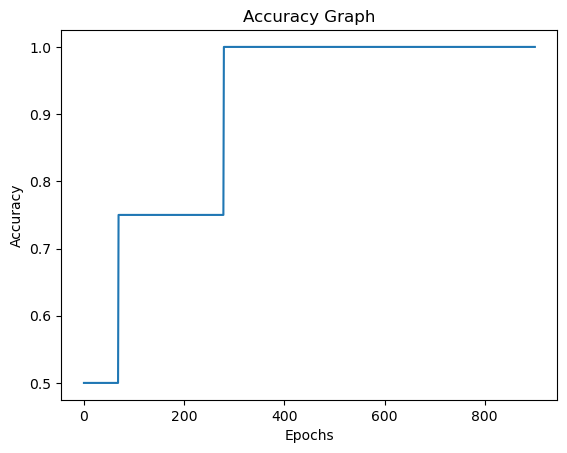

In [11]:
plot_x = np.linspace(0,num_epochs,num_epochs)
plot_y = TrainingLog.history['accuracy']
plt.plot(plot_x,plot_y)
plt.title('Accuracy Graph')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

In [12]:
# Evaluate the model
print("Evaluation: ",xor_model.evaluate(x,y))
print(np.round(xor_model.predict(x)))

1/1 [==============================] - 0s 102ms/step - loss: 0.3388 - accuracy: 1.0000
Evaluation:  [0.3388211131095886, 1.0]
[[0.]
 [0.]
 [1.]
 [1.]]
